In [1]:
!wget https://www.dropbox.com/s/1amhjlzg8j7o25j/6-12GPA_BusInfo.csv

--2020-04-02 16:08:16--  https://www.dropbox.com/s/1amhjlzg8j7o25j/6-12GPA_BusInfo.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1amhjlzg8j7o25j/6-12GPA_BusInfo.csv [following]
--2020-04-02 16:08:17--  https://www.dropbox.com/s/raw/1amhjlzg8j7o25j/6-12GPA_BusInfo.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4148b804e4365bfb6d9fd4b1a6.dl.dropboxusercontent.com/cd/0/inline/A1GPlvCfjZrxtM7dnVHFfqXvIIQUB2gNGXZmXW-URrEEUKceHewVIuAgX9A9bo0jqbnhc064HXspsJo4pf-BrZegNWGO1hT4qWuQi-v9CZVrjNJAfF5xrBAPKgva1xY-4aY/file# [following]
--2020-04-02 16:08:17--  https://uc4148b804e4365bfb6d9fd4b1a6.dl.dropboxusercontent.com/cd/0/inline/A1GPlvCfjZrxtM7dnVHFfqXvIIQUB2gNGXZmXW-URrEEUKceHewVIuAgX9A9bo0jqbnhc064HXspsJo4pf-BrZegNWGO1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('6-12GPA_BusInfo.csv')
data.shape

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,16,17,18,19,20,21,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(87642, 25)

In [0]:
df=data.copy()

In [4]:
df.head()   #87642 rows × 25 columns

,School Year,Building,Student ID,Grade,StreetNum,Street,City,State,Zip,Gender,Ethnicity,Poverty,ELL Eligible,CourseName,CourseDepartment,CourseID,FinalAverage,MP1Average,MP2Average,MP3Average,MP4Average,BusAM,BUSPM,AMBusDestination,PMBUSDestination
0,2015-2016,Averill Park High School,111097,12,64,Birds Hill Road,Averill Park,NY,12018.0,Male,White,0,0,PARTICIPATION IN GOVERNMENT,Social Studies,2SOC-402,83,NaN,NaN,85,81,NaN,NaN,NaN,NaN
1,2015-2016,Averill Park High School,111097,12,64,Birds Hill Road,Averill Park,NY,12018.0,Male,White,0,0,PSYCHOLOGY II,Distance Learning,2MUL-302D SM2,93,NaN,NaN,94,94,NaN,NaN,NaN,NaN
2,2015-2016,Averill Park High School,111097,12,64,Birds Hill Road,Averill Park,NY,12018.0,Male,White,0,0,PSYCHOLOGY I,Social Studies,2SOC-308 SM,92,99,89,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-2016,Averill Park High School,111097,12,64,Birds Hill Road,Averill Park,NY,12018.0,Male,White,0,0,PHYS ED S1,Physical Education,2PHY-111,85,80,90,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-2016,Averill Park High School,111097,12,64,Birds Hill Road,Averill Park,NY,12018.0,Male,White,0,0,ENG 12 WRITER'S WORKSHOP,English,2ENG-404 SM,92,96,93,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['School Year', 'Building', 'Student ID', 'Grade', 'StreetNum', 'Street',
       'City', 'State', 'Zip', 'Gender', 'Ethnicity', 'Poverty',
       'ELL Eligible', 'CourseName', 'CourseDepartment', 'CourseID',
       'FinalAverage', 'MP1Average', 'MP2Average', 'MP3Average', 'MP4Average',
       'BusAM', 'BUSPM', 'AMBusDestination', 'PMBUSDestination'],
      dtype='object')

In [6]:
#Remove 744 duplicates

df = df.drop_duplicates()
df.shape

(86898, 25)

In [7]:
#Check missing value
df.isnull().sum()

School Year             0
Building                0
Student ID              0
Grade                   0
StreetNum            1420
Street                 89
City                   89
State                  89
Zip                    89
Gender                  0
Ethnicity               0
Poverty                 0
ELL Eligible            0
CourseName              0
CourseDepartment        0
CourseID                0
FinalAverage        24039
MP1Average          26309
MP2Average          24657
MP3Average          38959
MP4Average          38925
BusAM               62995
BUSPM               64826
AMBusDestination    62995
PMBUSDestination    62995
dtype: int64

In [8]:
#Deal with the different formats in grade column
#Deal with the wrong classfication of ethnicity column
df.loc[df.Grade =='12','Grade']=12
df.loc[df.Grade =='13','Grade']=13
df.loc[df.Grade =='07','Grade']=7
df.loc[df.Grade =='08','Grade']=8
df.loc[df.Grade =='09','Grade']=9
df.loc[df.Grade =='11','Grade']=11
df.loc[df.Grade =='10','Grade']=10
df.loc[df.Grade =='9','Grade']=9
df.loc[df.Grade =='8','Grade']=8
df.loc[df.Grade =='7','Grade']=7
df.loc[df.Grade =='14','Grade']=14
df.loc[df.Grade =='06','Grade']=6
df.loc[df.Grade =='6','Grade']=6
df.loc[df.Ethnicity =='Multiple Races','Ethnicity'] = 'Multiracial'
df.loc[df.Ethnicity =='Hispanic','Ethnicity'] = 'Hispanic or Latino'
df['City'][df['City']=='AverillPark'] = 'Averill Park'
df['City'][df['City']=='West sand Lake'] = 'West Sand Lake'
df['City'][df['City']=='East Nassua'] = 'East Nassau'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
df.shape

In [0]:
df.Grade.value_counts()

In [0]:
df = df[df.Grade.isin([6,7,8,9,10,11,12])]
df.shape

In [11]:
abc=['A','B','C','D','F','P']
df = df[(~df.FinalAverage.isin(abc))&(~df.MP1Average.isin(abc))&(~df.MP2Average.isin(abc))&(~df.MP3Average.isin(abc))&(~df.MP4Average.isin(abc))]
df.shape

(85663, 25)

In [0]:
df.FinalAverage = df.FinalAverage.astype(float)
df.MP1Average = df.MP1Average.astype(float)
df.MP2Average = df.MP2Average.astype(float)
df.MP3Average = df.MP3Average.astype(float)
df.MP4Average = df.MP4Average.astype(float)

In [0]:
# from google.colab import files

# df.to_csv('df.csv')
# files.download('df.csv')

In [0]:
df2= df.copy()
df2 = df.drop_duplicates(subset='Student ID')
high2=df2[df2['Building']== 'Averill Park High School']
mid2 = df2[df2['Building']== 'Algonquin Middle School']

In [0]:
high=df[df['Building']== 'Averill Park High School']
mid = df[df['Building']== 'Algonquin Middle School']
high2=df2[df2['Building']== 'Averill Park High School']
mid2 = df2[df2['Building']== 'Algonquin Middle School']

In [0]:
#Start EDA analysis

In [16]:
df.columns

Index(['School Year', 'Building', 'Student ID', 'Grade', 'StreetNum', 'Street',
       'City', 'State', 'Zip', 'Gender', 'Ethnicity', 'Poverty',
       'ELL Eligible', 'CourseName', 'CourseDepartment', 'CourseID',
       'FinalAverage', 'MP1Average', 'MP2Average', 'MP3Average', 'MP4Average',
       'BusAM', 'BUSPM', 'AMBusDestination', 'PMBUSDestination'],
      dtype='object')

In [17]:
df['School Year'].value_counts()

2019-2020    23614
2015-2016    15933
2016-2017    15822
2017-2018    15625
2018-2019    14669
Name: School Year, dtype: int64

In [18]:
df.Building.value_counts()

Averill Park High School    54875
Algonquin Middle School     30788
Name: Building, dtype: int64

In [19]:
df[['Student ID','Grade','Gender']].groupby(['Student ID','Grade']).count()

Gender
Student ID Grade        
11286      7           9
           8           9
           9          10
18197      12          5
18680      12         11
...                  ...
2009131    12         13
2030006    7           9
           8           9
           9           9
           10         11

[6973 rows x 1 columns]

In [20]:
df.Grade.value_counts()

7     14283
12    14184
10    14006
9     13461
11    13224
8     13063
6      3442
Name: Grade, dtype: int64

In [21]:
df.columns

Index(['School Year', 'Building', 'Student ID', 'Grade', 'StreetNum', 'Street',
       'City', 'State', 'Zip', 'Gender', 'Ethnicity', 'Poverty',
       'ELL Eligible', 'CourseName', 'CourseDepartment', 'CourseID',
       'FinalAverage', 'MP1Average', 'MP2Average', 'MP3Average', 'MP4Average',
       'BusAM', 'BUSPM', 'AMBusDestination', 'PMBUSDestination'],
      dtype='object')

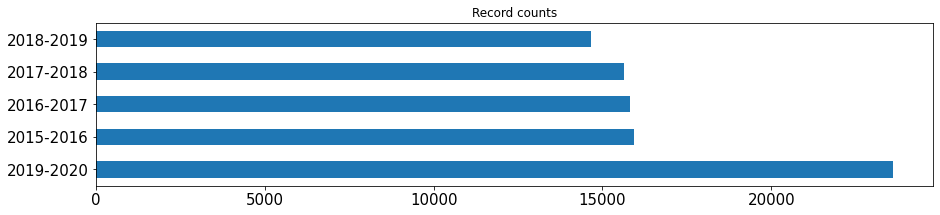

In [22]:
df['School Year'].value_counts().plot(kind='barh',title='Record counts',figsize=(15,3),fontsize=15)

In [23]:
df['Building'].value_counts()

Averill Park High School    54875
Algonquin Middle School     30788
Name: Building, dtype: int64

In [24]:
len(df['Student ID'].unique().tolist())

2707

In [25]:
df[['Student ID','Grade']].groupby('Student ID').count().sort_values(by='Grade').mean()

Grade    31.644994
dtype: float64

In [26]:
id_2015 = set(df['Student ID'][df['School Year']== '2015-2016'].unique().tolist())
id_2016 = set(df['Student ID'][df['School Year']== '2016-2017'].unique().tolist())
id_2017 = set(df['Student ID'][df['School Year']== '2017-2018'].unique().tolist())
id_2018 = set(df['Student ID'][df['School Year']== '2018-2019'].unique().tolist())
id_2019 = set(df['Student ID'][df['School Year']== '2019-2020'].unique().tolist())
len(id_2015 & id_2016&id_2017&id_2018&id_2019)

359

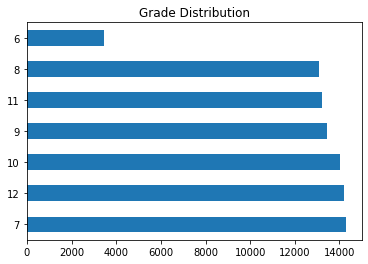

In [27]:
df.Grade.value_counts().plot(kind='barh',title='Grade Distribution')

In [28]:
df[['School Year','Grade','Gender']].groupby(['School Year','Grade']).count()

Gender
School Year Grade        
2015-2016   6          79
            7        2497
            8        2633
            9        2744
            10       2872
            11       2510
            12       2598
2016-2017   6         111
            7        2567
            8        2534
            9        2673
            10       2489
            11       2773
            12       2675
2017-2018   6         114
            7        2650
            8        2527
            9        2404
            10       2581
            11       2347
            12       3002
2018-2019   6         107
            7        2625
            8        2308
            9        2331
            10       2392
            11       2273
            12       2633
2019-2020   6        3031
            7        3944
            8        3061
            9        3309
            10       3672
            11       3321
            12       3276

In [29]:
df['City'][df['City']=='AverillPark'] = 'Averill Park'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
add=df[~df['Street'].isnull()]

In [0]:
addressesnotnull=add.drop_duplicates(subset='Student ID')

In [32]:
addressesnotnull.City.value_counts(1)

Averill Park        0.379029
Wynantskill         0.216376
West Sand Lake      0.125232
Poestenkill         0.083364
Troy                0.080400
Sand Lake           0.029270
East Nassau         0.018525
East Greenbush      0.015932
Stephentown         0.011856
Nassau              0.010374
Rensselaer          0.008151
Castleton           0.003335
Watervliet          0.001853
Albany              0.001482
North Greenbush     0.001112
Berlin              0.001112
Cohoes              0.001112
Petersburg          0.001112
Purling             0.000741
Cropseyville        0.000741
Schodack Landing    0.000741
CHeektowaga         0.000741
Palatine Bridge     0.000371
Delmar              0.000371
Brunswick           0.000371
Greenville          0.000371
Altamont            0.000371
Mechanicville       0.000371
Freehold            0.000371
Round Top           0.000371
East Durham         0.000371
Port Deposit        0.000371
East Berne          0.000371
Fishers Island      0.000371
Pattersonville

In [33]:
addressesnotnull.State.value_counts(1)

NY    0.999259
NH    0.000371
MD    0.000371
Name: State, dtype: float64

In [34]:
addressesnotnull.City.value_counts(1)

Averill Park        0.379029
Wynantskill         0.216376
West Sand Lake      0.125232
Poestenkill         0.083364
Troy                0.080400
Sand Lake           0.029270
East Nassau         0.018525
East Greenbush      0.015932
Stephentown         0.011856
Nassau              0.010374
Rensselaer          0.008151
Castleton           0.003335
Watervliet          0.001853
Albany              0.001482
North Greenbush     0.001112
Berlin              0.001112
Cohoes              0.001112
Petersburg          0.001112
Purling             0.000741
Cropseyville        0.000741
Schodack Landing    0.000741
CHeektowaga         0.000741
Palatine Bridge     0.000371
Delmar              0.000371
Brunswick           0.000371
Greenville          0.000371
Altamont            0.000371
Mechanicville       0.000371
Freehold            0.000371
Round Top           0.000371
East Durham         0.000371
Port Deposit        0.000371
East Berne          0.000371
Fishers Island      0.000371
Pattersonville

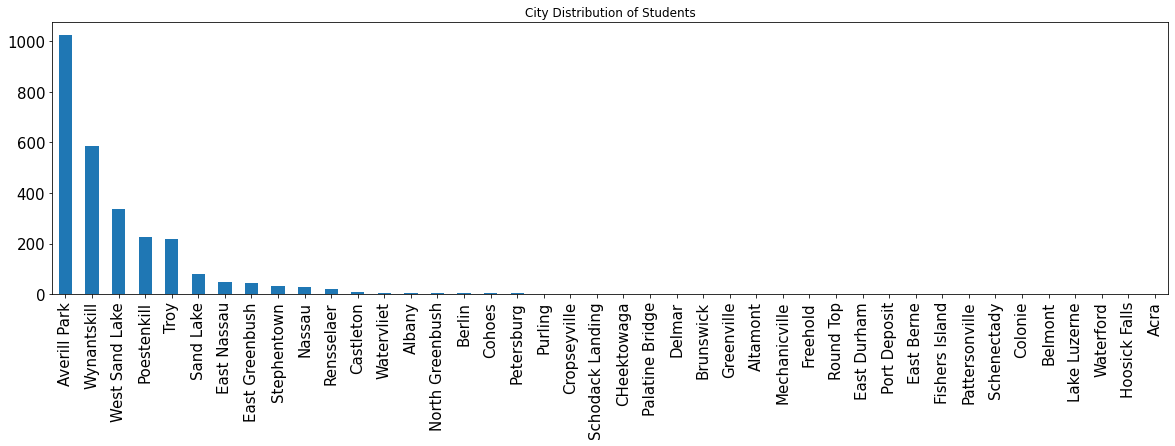

In [35]:
addressesnotnull.City.value_counts().plot(kind='bar',figsize=(20,5),fontsize=15,title ='City Distribution of Students')

In [36]:
len(addressesnotnull.City.unique())

42

In [37]:
addressesnotnull.Zip.value_counts(1)

12018.0    0.379770
12198.0    0.217117
12196.0    0.125232
12140.0    0.083364
12180.0    0.080771
12153.0    0.029270
12062.0    0.019637
12061.0    0.015932
12123.0    0.009263
12169.0    0.008151
12144.0    0.008151
12168.0    0.003705
12033.0    0.003705
12189.0    0.001853
12047.0    0.001112
12022.0    0.001112
12138.0    0.001112
12052.0    0.000741
12204.0    0.000741
12470.0    0.000741
12205.0    0.000371
12187.0    0.000371
12423.0    0.000371
12431.0    0.000371
6390.0     0.000371
3220.0     0.000371
12304.0    0.000371
12118.0    0.000371
12059.0    0.000371
12473.0    0.000371
12210.0    0.000371
12182.0    0.000371
12405.0    0.000371
12188.0    0.000371
13428.0    0.000371
12090.0    0.000371
21904.0    0.000371
12083.0    0.000371
12846.0    0.000371
12208.0    0.000371
12054.0    0.000371
12009.0    0.000371
12156.0    0.000371
Name: Zip, dtype: float64

In [38]:
addressesnotnull.Street.value_counts(1).sort_values()

Schodack Drive       0.000371
Dahl Way             0.000371
Van Slyke Lane       0.000371
Coonradt Blvd        0.000371
Harriman Road Ext    0.000371
                       ...   
Francis Drive        0.014820
NY Highway 43        0.014820
Kent Place           0.015561
Burden Lake Road     0.017414
NY 43                0.023342
Name: Street, Length: 705, dtype: float64

In [0]:
# # ddd=addressesnotnull.Street.value_counts(1).sort_values()

# ddd.to_csv('ddd.csv')

# files.download('ddd.csv')

In [40]:
addressesnotnull[['City','Street','StreetNum']].groupby(['City','Street']).count()

StreetNum
City        Street                          
Acra        Route 31                       1
Albany      Colonial Avenue                1
            Dutch Village                  2
            Hamilton Strret Apt 4          1
Altamont    Township Road                  1
...                                      ...
Wynantskill White Tail Circle             14
            Whiteview Road                 1
            Williams Street                3
            Willow Lane                    3
            Woodbury Hill Road             1

[758 rows x 1 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f740aea9a20>],
      dtype=object)

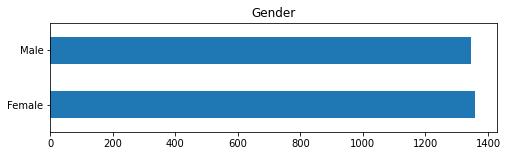

In [41]:
df2.Gender.value_counts().plot(kind='barh',subplots=True,figsize=(8,2))

In [42]:
mid2.Gender.value_counts(1)

Female    0.50894
Male      0.49106
Name: Gender, dtype: float64

In [43]:
high2.Gender.value_counts(1)

Male      0.506573
Female    0.493427
Name: Gender, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f740968dc88>],
      dtype=object)

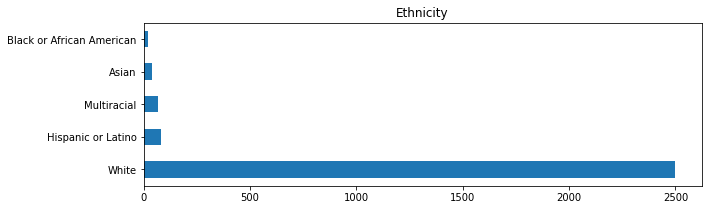

In [44]:
df2.Ethnicity.value_counts().plot(kind='barh',subplots=True,figsize=(10,3))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f740962b860>],
      dtype=object)

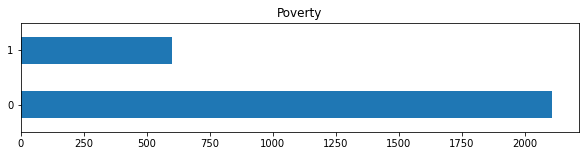

In [45]:
df2.Poverty.value_counts().plot(kind = 'barh',figsize=(10,2),subplots=True)

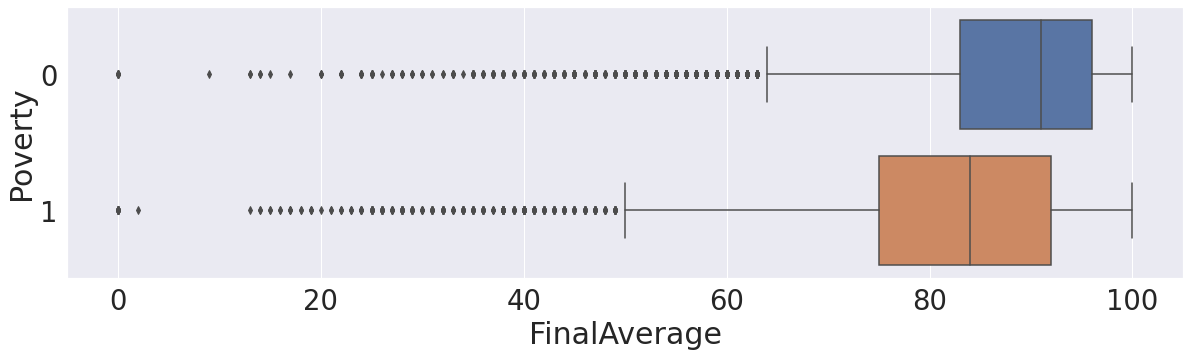

In [46]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.set(font_scale=2.5)
sns.boxplot( x= df.FinalAverage,y= df.Poverty,orient='h')

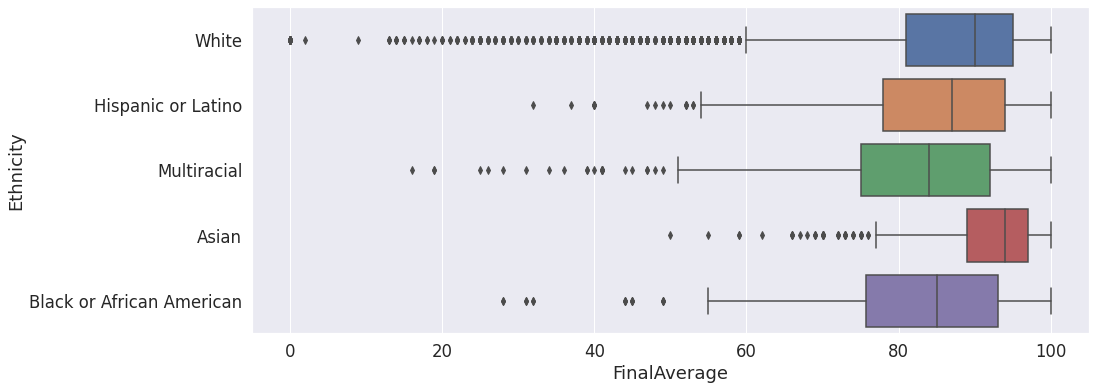

In [47]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
sns.boxplot(x = df.FinalAverage,y= df.Ethnicity)

In [48]:
df2.Ethnicity.value_counts(1)

White                        0.922793
Hispanic or Latino           0.029553
Multiracial                  0.024751
Asian                        0.014407
Black or African American    0.008496
Name: Ethnicity, dtype: float64

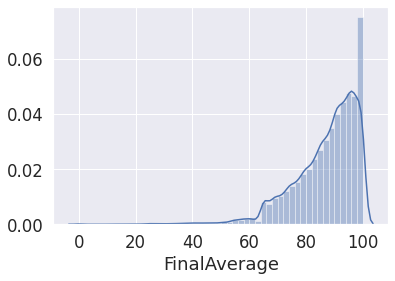

In [49]:
sns.distplot(df.FinalAverage)

In [50]:
len(list(set(df['Student ID'][df['Poverty']==1].unique().tolist()) & set(df['Student ID'][df['Poverty']==0].unique().tolist())))

151

In [51]:
df2[['School Year', 'Gender','Poverty']].groupby(['School Year','Gender']).count()

Poverty
School Year Gender         
2015-2016   Female      716
            Male        717
2016-2017   Female      149
            Male        157
2017-2018   Female      135
            Male        124
2018-2019   Female      138
            Male        123
2019-2020   Female      222
            Male        226

In [52]:
df.columns

Index(['School Year', 'Building', 'Student ID', 'Grade', 'StreetNum', 'Street',
       'City', 'State', 'Zip', 'Gender', 'Ethnicity', 'Poverty',
       'ELL Eligible', 'CourseName', 'CourseDepartment', 'CourseID',
       'FinalAverage', 'MP1Average', 'MP2Average', 'MP3Average', 'MP4Average',
       'BusAM', 'BUSPM', 'AMBusDestination', 'PMBUSDestination'],
      dtype='object')

In [53]:
df2['ELL Eligible'].value_counts()

0    2695
1      12
Name: ELL Eligible, dtype: int64

In [54]:
df2[['Poverty','ELL Eligible','CourseName']].groupby(['Poverty','ELL Eligible']).count()

CourseName
Poverty ELL Eligible            
0       0                   2107
        1                      1
1       0                    588
        1                     11

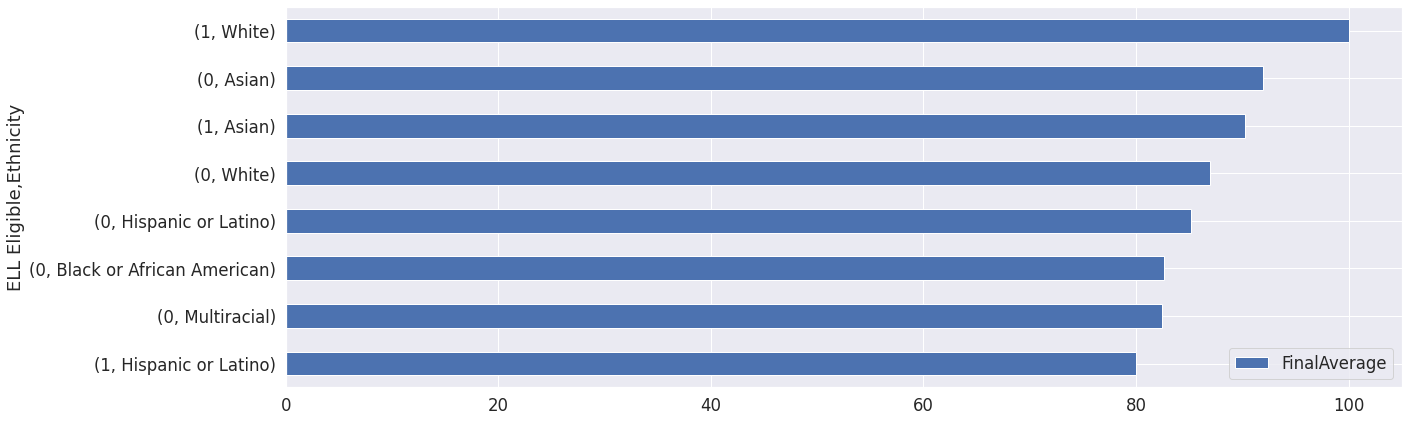

In [55]:
df[['ELL Eligible','Ethnicity','FinalAverage']].groupby(['ELL Eligible','Ethnicity']).mean().sort_values(by='FinalAverage').plot(kind='barh',figsize=(20,7))

In [56]:
df2[['ELL Eligible','Ethnicity','FinalAverage']].groupby(['ELL Eligible','Ethnicity']).count()

FinalAverage
ELL Eligible Ethnicity                              
0            Asian                                31
             Black or African American            18
             Hispanic or Latino                   60
             Multiracial                          43
             White                              2097
1            Asian                                 1
             Hispanic or Latino                    7
             White                                 1

In [57]:
df.shape

(85663, 25)

In [58]:
df.CourseName.value_counts()

PE3-LIFETIME ACTIVITIES        3366
PE1-STRENGTH & CONDITIONING    3228
PE2-TEAM SPORTS                2535
HEALTH                         1504
Soc. St. 7                     1439
                               ... 
HEALTHY SR. STUDY PROJECT         1
NV-ECONOMICS HONORS               1
PRODUCTION                        1
APEX-SCIENCE                      1
INTENSIVE MATH                    1
Name: CourseName, Length: 449, dtype: int64

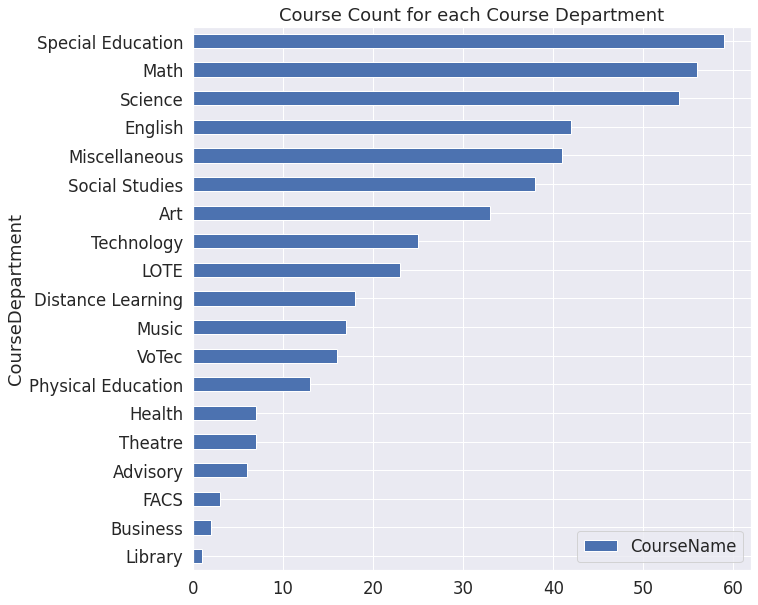

In [59]:
df[['CourseDepartment','CourseName']].drop_duplicates(subset =['CourseDepartment','CourseName'], keep = 'first').groupby('CourseDepartment').count().sort_values(by='CourseName').plot(kind = 'barh', figsize=(10,10),title='Course Count for each Course Department')

In [60]:
len(df.CourseDepartment.unique().tolist())

19

In [61]:
df[['CourseName','CourseID','FinalAverage']].groupby(['CourseName','CourseID']).count()

FinalAverage
CourseName             CourseID                
3-D PORTFOLIO          2ART-309              32
                       2ART-309-1             0
ACCOUNTING 1           2MIS-560D              6
ACTING                 2THE-202              42
ADV 3-D                2ART-307              18
...                                         ...
Warrior Fundamentals 8 8605-2                 0
                       8605-3                 0
                       8605-4                 0
                       8605-5                 0
                       8605-6                 0

[1543 rows x 1 columns]

In [0]:
#Importing new dataset with no empty final average
!wget https://www.dropbox.com/s/xjfumh6x62h2lb8/newdf%20after%20processing.csv

In [0]:
newdf = pd.read_csv('newdf after processing.csv')
newdf.isnull().sum()

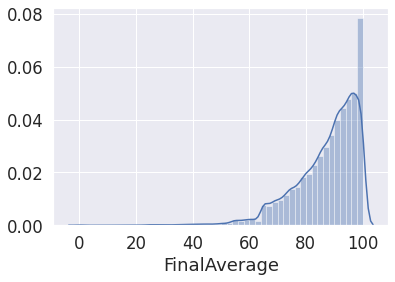

In [65]:
sns.distplot(newdf.FinalAverage)

In [0]:
eng = newdf[newdf['CourseDepartment']=='English']

math = newdf[newdf['CourseDepartment']=='Math']

sci= newdf[newdf['CourseDepartment']=='Science']

social = newdf[newdf['CourseDepartment']=='Social Studies']


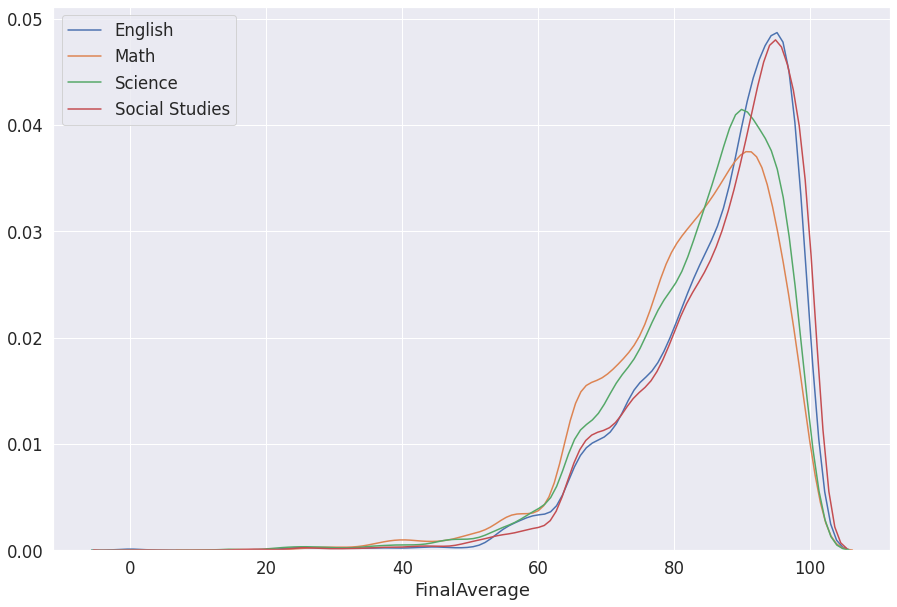

In [67]:
plt.figure(figsize=(15,10))
sns.distplot(eng.FinalAverage,hist=False,label='English')
sns.distplot(math.FinalAverage,hist=False,label='Math')
sns.distplot(sci.FinalAverage,hist=False,label='Science')
sns.distplot(social.FinalAverage,hist=False,label='Social Studies')

Text(0.5, 1.0, 'Social Studies Final average in different grades')

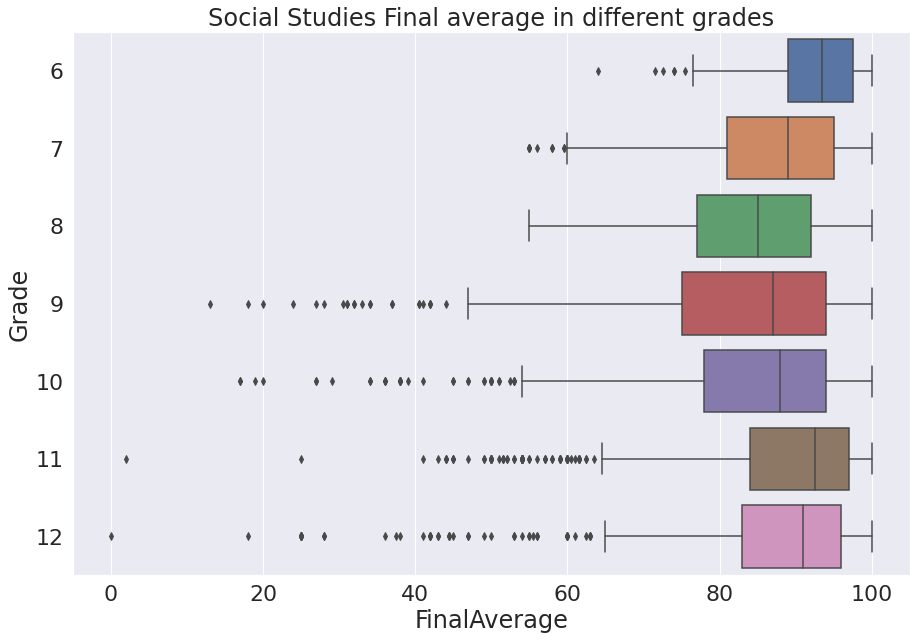

In [69]:
plt.figure(figsize=(15,10))
sns.set(font_scale=2)

sns.boxplot(x='FinalAverage',y='Grade',data = social,orient='h').set_title("Social Studies Final average in different grades")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7408d27780>],
      dtype=object)

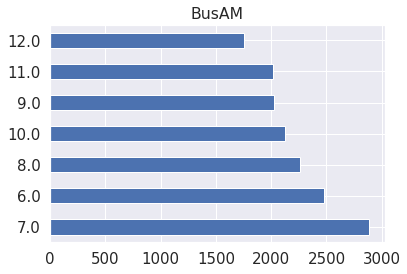

In [70]:
sns.set(font_scale=1.3)
newdf['BusAM'].value_counts().plot(kind='barh',fontsize=15,subplots=True)

In [71]:
newdf['BusAM'].value_counts()

7.0     2884
6.0     2475
8.0     2261
10.0    2121
9.0     2028
11.0    2017
12.0    1753
Name: BusAM, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74089eac18>],
      dtype=object)

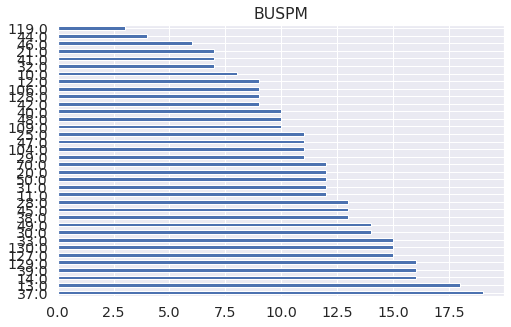

In [82]:
newdf2=newdf.drop_duplicates(subset='Student ID')
newdf2['BUSPM'].value_counts().plot(kind='barh',figsize = (8,10),subplots=True)



In [94]:
pd.DataFrame(newdf2['BUSPM'].value_counts())

,BUSPM
37.0,19
13.0,18
14.0,16
39.0,16
129.0,16
127.0,15
130.0,15
33.0,15
30.0,14
49.0,14


In [97]:
newdf2.AMBusDestination.value_counts(1)

<Home>                 0.907658
<Parent Transp>        0.038288
<None>                 0.036036
12 Rabie Rd            0.002252
287 Rt #355            0.002252
bon acher way          0.002252
1159 Burden Lake Rd    0.002252
7727 Route 66          0.002252
382 3rd Ave            0.002252
26 Sheer Rd            0.002252
5 ADAMS COURT          0.002252
Name: AMBusDestination, dtype: float64

In [99]:
newdf2.PMBUSDestination.value_counts(1)

<Home>                           0.880631
<Parent Transp>                  0.056306
<None>                           0.036036
3163 rte 43                      0.002252
Miller Hill Child Care           0.002252
21 Snyders Corners Rd            0.002252
12 Rabie Rd                      0.002252
3049 ny rte 43                   0.002252
128 Main Street - Poestenkill    0.002252
43 Dahl Drive                    0.002252
bon acher way                    0.002252
1159 Burden Lake Rd              0.002252
7727 Route 66                    0.002252
382 3rd Ave                      0.002252
26 Sheer Rd                      0.002252
Name: PMBUSDestination, dtype: float64